In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Checking for missing values
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
# Checking how many missing values
df.isnull().sum().sum()

0

In [ ]:
# find duplicate rows
duplicate_rows = df.duplicated()

# print duplicate rows
print(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


In [ ]:
# Count duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


# Exploratory Data Analysis


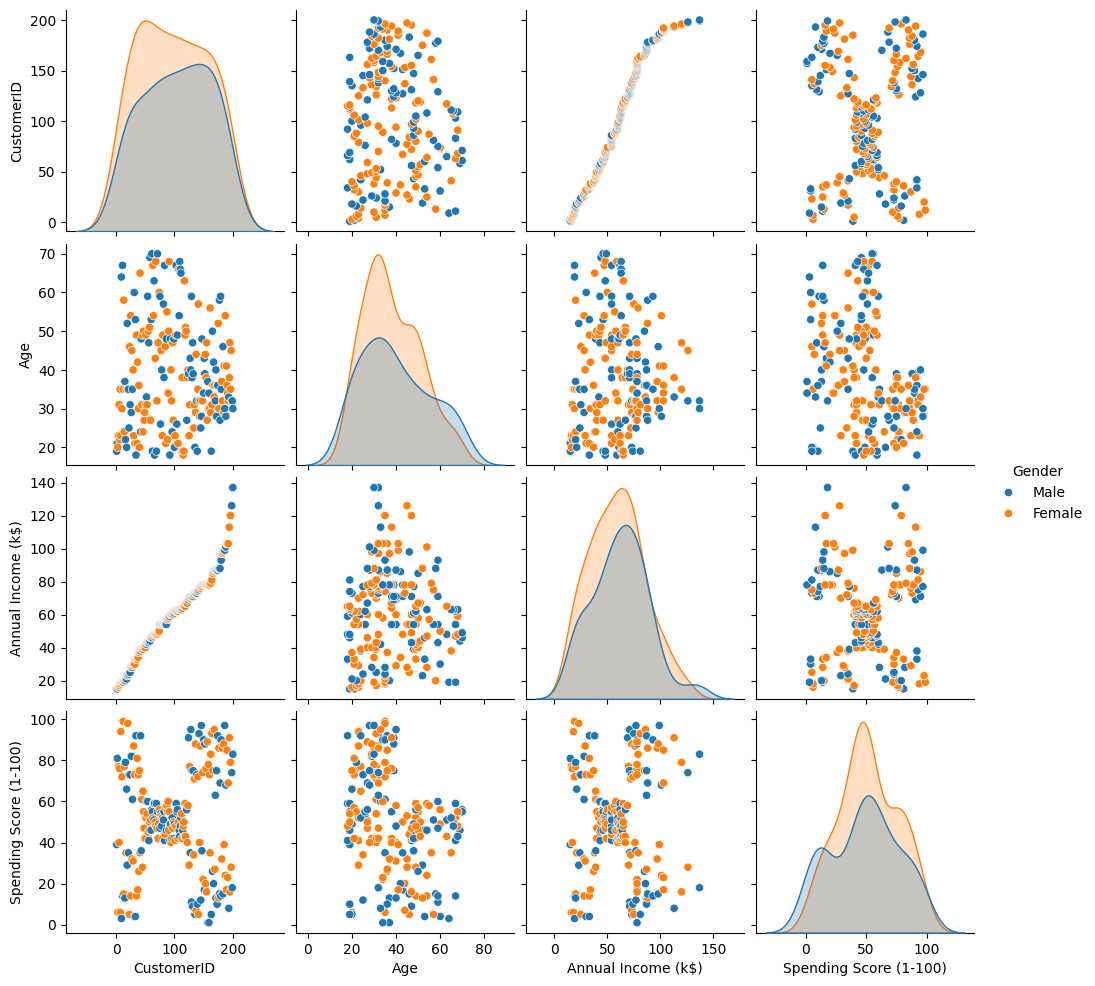

In [ ]:
sns.pairplot(df, hue='Gender')

<Axes: xlabel='Gender', ylabel='Count'>

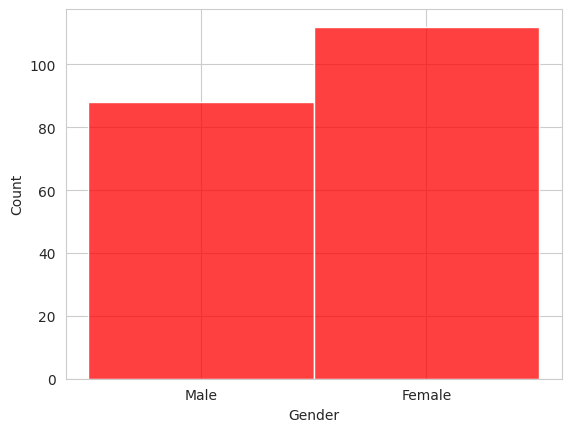

In [ ]:
sns.set_style('whitegrid')
sns.histplot(df['Gender'],color ='red', bins = 10)

In [ ]:
fig = px.scatter(df, x="Gender", y="Age")
fig.show()

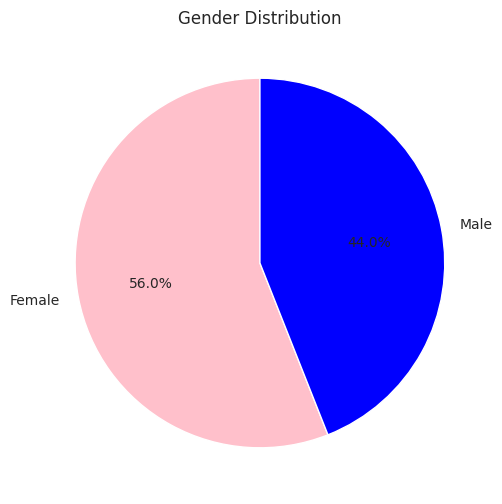

In [ ]:

# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'blue'], startangle=90)
plt.title('Gender Distribution')
plt.show()

# Data Preprocessing

In [ ]:
# Scaling the numerical data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
# Encoding variables to 0 and 1 for clustering
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

<Axes: >

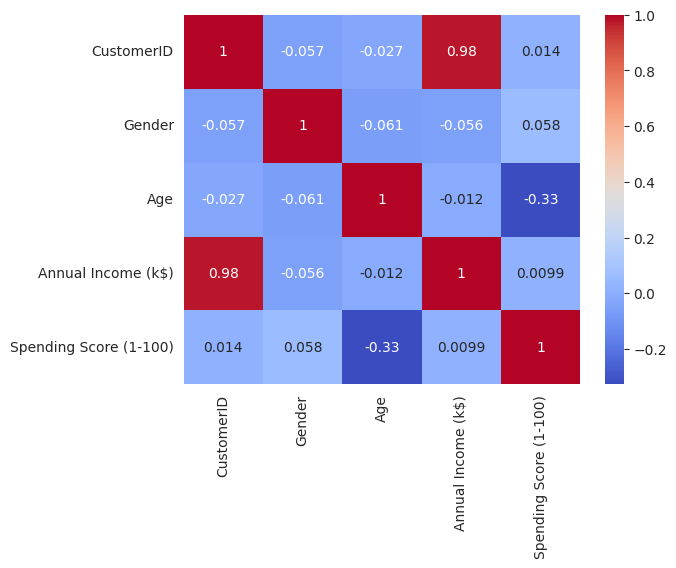

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

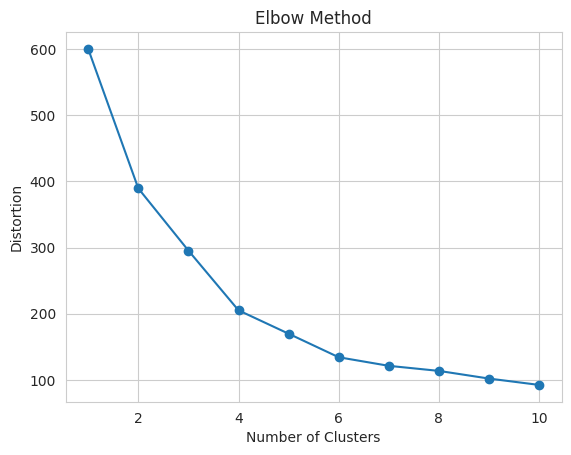

In [ ]:
# finding optimal number of clusters using elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# Create a list to store distortion values
distortions = []

# Range of cluster numbers to try
K = range(1, 11)

# Calculate distortion for each number of clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Replace df_scaled with your scaled data
    distortions.append(kmeans.inertia_)  # Inertia is the distortion measure

# Print distortion values
print("Distortion values for each number of clusters:")
for i, d in enumerate(distortions, start=1):
    print(f"Clusters: {i}, Distortion: {d}")

Distortion values for each number of clusters:
Clusters: 1, Distortion: 599.9999999999999
Clusters: 2, Distortion: 389.38618895643714
Clusters: 3, Distortion: 295.4562449213557
Clusters: 4, Distortion: 205.22514747675913
Clusters: 5, Distortion: 169.89149793438568
Clusters: 6, Distortion: 134.35277477401493
Clusters: 7, Distortion: 121.38935022502866
Clusters: 8, Distortion: 113.72723000071333
Clusters: 9, Distortion: 102.13623844329251
Clusters: 10, Distortion: 92.55027231838784


In [ ]:
# Create a list to store the inertia (distortion) values
inertia_values = []

# Range of cluster numbers to try (1 to 10 clusters in this example)
K = range(1, 11)

# Fit KMeans for each k and store the inertia values
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Replace df_scaled with your data (scaled or raw)
    inertia_values.append(kmeans.inertia_)  # kmeans.inertia_ stores the inertia (distortion)

# Print the inertia values for each number of clusters
print("Inertia values for each number of clusters:")
for i, inertia in enumerate(inertia_values, start=1):
    print(f"Clusters: {i}, Inertia: {inertia}")


Inertia values for each number of clusters:
Clusters: 1, Inertia: 599.9999999999999
Clusters: 2, Inertia: 389.38618895643714
Clusters: 3, Inertia: 295.4562449213557
Clusters: 4, Inertia: 205.22514747675913
Clusters: 5, Inertia: 169.89149793438568
Clusters: 6, Inertia: 134.35277477401493
Clusters: 7, Inertia: 121.38935022502866
Clusters: 8, Inertia: 113.72723000071333
Clusters: 9, Inertia: 102.13623844329251
Clusters: 10, Inertia: 92.55027231838784


We picked 4 as the desired number of clusters as beyond 4 clusters will result in diminishing returns

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

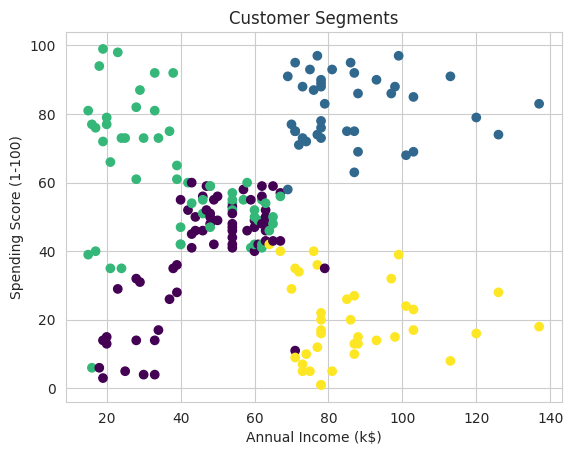

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

In [ ]:

# Fit the model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)

# Get the labels (assigned clusters) from the fitted model
labels = kmeans.labels_

# Calculate the Silhouette Score
sil_score = silhouette_score(df_scaled, labels)

# Print the Silhouette Score
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.4039582785148566


In [ ]:
# Group by 'Cluster' and calculate the mean for both 'Annual Income' and 'Spending Score'
cluster_means = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()

# Create a side-by-side bar chart
fig = px.bar(cluster_means, x='Cluster', y=['Annual Income (k$)', 'Spending Score (1-100)'],
             barmode='group', title="Annual Income and Spending Score by Cluster")

# Show the plot
fig.show()